<a href="https://colab.research.google.com/github/yunseo4401/ML/blob/master/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
from tensorflow import keras
(train_input,train_target),(test_input,test_target)=keras.datasets.fashion_mnist.load_data()
print(train_input.shape,train_target.shape)
print(test_input.shape,test_target.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [12]:
train_scaled=train_input/255.0 
#255로 나누어 정규화 
train_scaled=train_scaled.reshape(-1,28,28,1)
#1차원배열로 바꾸어 줌 

In [13]:
from sklearn.model_selection import train_test_split 
train_scaled,val_scaled,train_target,val_target=train_test_split(train_scaled,train_target,test_size=0.2,random_state=42)

In [14]:
model=keras.Sequential()

In [15]:
model.add(keras.layers.Conv2D(32,kernel_size=3,activation='relu',padding='same',input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D(2))  
model.add(keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu',padding='same'))
model.add(keras.layers.MaxPooling2D(2))

In [16]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10,activation='softmax'))

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 3136)              0         
                                                                 
 dense_2 (Dense)             (None, 100)              

In [18]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')
early_stopping_cb=keras.callbacks.EarlyStopping(patience=2,restore_best_weights=True)
history=model.fit(train_scaled,train_target,epochs=20,validation_data=(val_scaled,val_target),callbacks=[early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 45s 29ms/step - loss: 0.5280 - accuracy: 0.8113 - val_loss: 0.3382 - val_accuracy: 0.8737
Epoch 2/20
1500/1500 [==============================] - 66s 44ms/step - loss: 0.3535 - accuracy: 0.8718 - val_loss: 0.2920 - val_accuracy: 0.8911
Epoch 3/20
1500/1500 [==============================] - 57s 38ms/step - loss: 0.2997 - accuracy: 0.8925 - val_loss: 0.2638 - val_accuracy: 0.9028
Epoch 4/20
1500/1500 [==============================] - 50s 33ms/step - loss: 0.2714 - accuracy: 0.9001 - val_loss: 0.2501 - val_accuracy: 0.9087
Epoch 5/20
1500/1500 [==============================] - 43s 29ms/step - loss: 0.2468 - accuracy: 0.9086 - val_loss: 0.2370 - val_accuracy: 0.9128
Epoch 6/20
1500/1500 [==============================] - 45s 30ms/step - loss: 0.2266 - accuracy: 0.9162 - val_loss: 0.2416 - val_accuracy: 0.9138
Epoch 7/20
1500/1500 [==============================] - 44s 29ms/step - loss: 0.2101 - accuracy: 0.9233 - val_loss: 0.2469 -

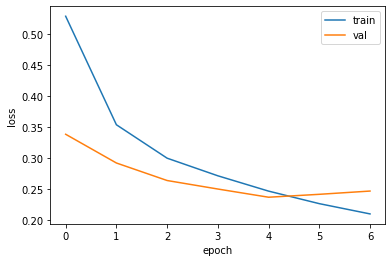

In [19]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

375/375 [==============================] - 3s 9ms/step - loss: 0.2370 - accuracy: 0.9128


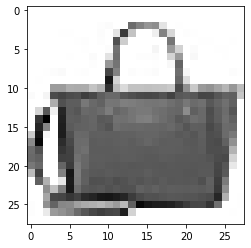

In [20]:
model.evaluate(val_scaled,val_target)
plt.imshow(val_scaled[0].reshape(28,28),cmap='gray_r')
plt.show()

In [21]:
preds=model.predict(val_scaled[0:1])
print(preds) #10개의 클래스에 대한 예측 확률 출력 

1/1 [==============================] - 0s 104ms/step
[[2.9331613e-14 3.0338724e-16 1.5250339e-14 1.0612756e-14 1.9791836e-14
  6.7570558e-15 2.0867029e-13 1.3385576e-13 1.0000000e+00 1.0285800e-15]]


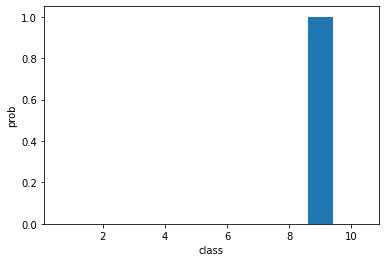

In [23]:
plt.bar(range(1,11),preds[0])
plt.xlabel('class')
plt.ylabel('prob')
plt.show()